In [1]:
# loading various libraries 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping


import numpy as np 
import random 
import matplotlib.pyplot as plt 
import datetime


In [2]:
# set seed value 
from numpy.random import seed 
seed(1)

In [3]:
#load Fashion MNIST Dataset
df = keras.datasets.fashion_mnist
(train_images, train_lables),(test_images, test_labels) = df.load_data()

In [4]:
#create an array to access the class name based on label number. 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#lets see the division of our dataset 
print(len(train_images),len(test_images))

60000 10000


In [6]:
#check the shape
train_images[0].shape

(28, 28)

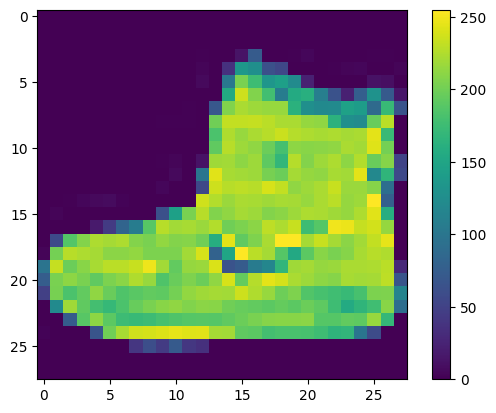

In [7]:
# range of pixel value
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

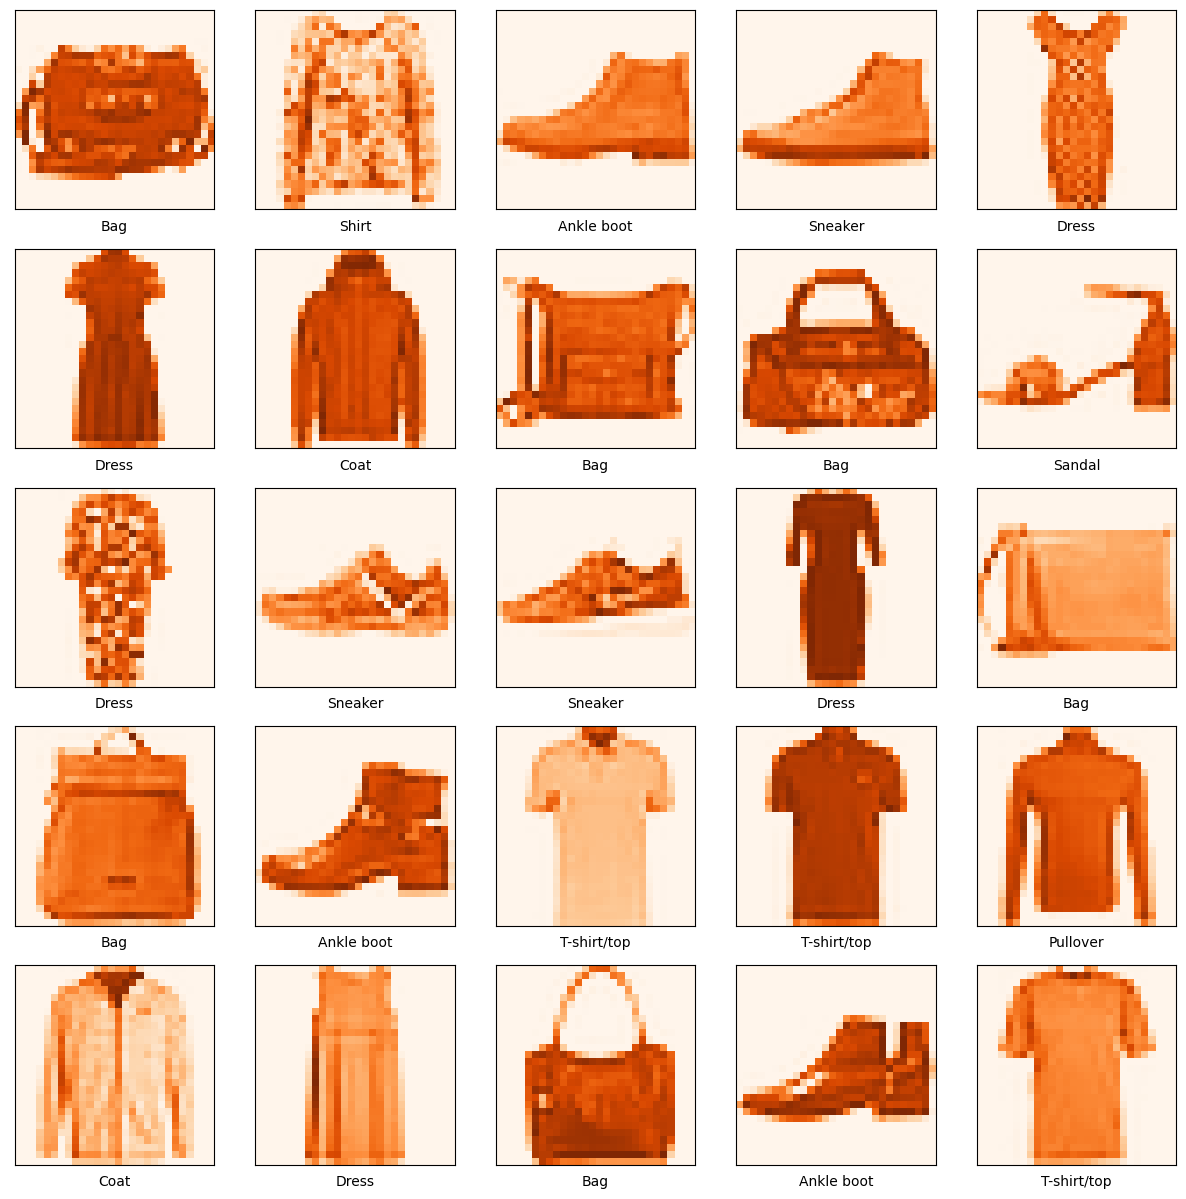

In [8]:
#lets observe the dataset
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    rand_no = random.randint(0,len(train_images))
    plt.imshow(train_images[rand_no],cmap='Oranges')
    plt.xlabel(class_names[train_lables[rand_no]])
    
    


In [9]:
#normazling the pixel values 
#As to have The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value.
train_images = train_images/ 255.0
test_images = test_images / 255.0

In [10]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [11]:
#building the Model
model =Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer ="Adam", 
loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])

#Place the logs in a timestamped subdirectory to allow easy selection of different training runs
#callback ensures that logs are created and stored
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

epochs=model.fit(x=train_images,  y=train_lables, batch_size=128, epochs=40,  validation_split=0.2, callbacks=[tensorboard_callback])

Metal device set to: Apple M2


2023-01-05 19:19:04.653002: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-05 19:19:04.653497: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/40


2023-01-05 19:19:05.059810: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-05 19:19:05.258683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


371/375 [============================>.] - ETA: 0s - loss: 0.5173 - accuracy: 0.8121

2023-01-05 19:19:08.057806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 4s 8ms/step - loss: 0.5157 - accuracy: 0.8128 - val_loss: 0.3974 - val_accuracy: 0.8573
Epoch 2/40
375/375 [==============================] - 3s 8ms/step - loss: 0.3695 - accuracy: 0.8652 - val_loss: 0.3789 - val_accuracy: 0.8563
Epoch 3/40
375/375 [==============================] - 3s 7ms/step - loss: 0.3283 - accuracy: 0.8783 - val_loss: 0.3528 - val_accuracy: 0.8730
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 0.3031 - accuracy: 0.8874 - val_loss: 0.3273 - val_accuracy: 0.8797
Epoch 5/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2872 - accuracy: 0.8937 - val_loss: 0.3381 - val_accuracy: 0.8754
Epoch 6/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2702 - accuracy: 0.8991 - val_loss: 0.3228 - val_accuracy: 0.8843
Epoch 7/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2531 - accuracy: 0.9039 - val_loss: 0.3117 - val_accuracy: 0.8896
Epoch 8/40
375/37

In [12]:
%load_ext tensorboard


In [30]:
#lets observe the plots using tensorbords 
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 14909), started 0:14:10 ago. (Use '!kill 14909' to kill it.)

In [38]:
#model evaluation
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.6035 - accuracy: 0.8847


[0.6035060882568359, 0.8847000598907471]

In [39]:
#lets do a prediction
predict = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [40]:
#prediction shape
predict.shape

(10000, 10)

In [41]:
#name of the image predicted 
class_names[np.argmax(predict[190])]

'Trouser'

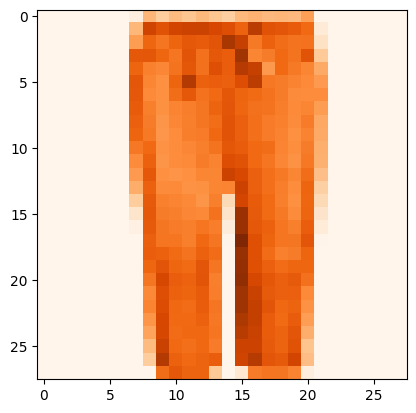

In [42]:
#image plot 
plt.imshow(test_images[190],cmap='Oranges')

In [43]:
#saving the model as a pickle 
import pickle
pickle.dump(model, open("model.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://5c749fb0-4657-4613-ac11-28ea033e2f94/assets
